In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<h3>1.	Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [387]:
# загружаем данные из sklearn 
from sklearn.datasets import make_classification
X, y = make_classification(scale=1)
X.shape, y.shape

((100, 20), (100,))

In [423]:
np.unique(y)

array([0, 1])

<h3>2.	Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [427]:
from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('scores = {:.3f}'.format(clf.score(X_test, y_test)))

(80, 20) (80,)
(20, 20) (20,)
scores = 0.850


In [390]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores2 = cross_val_score(clf, X, y, cv=5)
print('scores2 = {} \nmean score2 = {:.3f} +/- {:.3f}'.format(scores2, scores2.mean(), scores2.std()))

scores2 = [0.85 0.75 0.95 0.85 0.85] 
mean score2 = 0.850 +/- 0.063


In [391]:
# создадим датафрейм и пронумеруем столбцы
X2 = pd.DataFrame(X)
X2.columns =['№1', '№2', '№3', '№4','№5', '№6', '№7', '№8','№9', '№10', '№11', '№12','№13', '№14', '№15', '№16','№17', '№18', '№19', '№20']
y2 = pd.DataFrame(y)
y2.rename(columns={0: 'Target'}, inplace=True)
df2 = pd.concat([X2, y2], axis=1)
df2.describe()

,№1,№2,№3,№4,№5,№6,№7,№8,№9,№10,...,№12,№13,№14,№15,№16,№17,№18,№19,№20,Target
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.009671,-0.009897,0.123014,-0.060047,-0.043631,-0.144394,-0.024875,-0.080074,-0.058212,0.063089,...,0.019312,0.042096,0.095545,0.066563,-0.020225,-0.006846,-0.063506,0.033403,0.116963,0.490000
std,1.010861,1.038697,1.011214,1.037146,0.907597,0.939478,0.984598,1.012737,1.052628,1.131582,...,0.879843,0.837570,0.990216,1.039382,1.120901,0.394759,1.177459,0.972363,0.955645,0.502418
min,-2.517105,-2.476455,-2.604436,-2.271879,-2.093710,-2.340927,-1.856741,-2.974221,-2.250357,-2.321175,...,-2.783412,-1.729211,-3.110141,-2.497815,-2.794032,-0.986794,-2.806473,-1.765649,-2.025931,0.000000
25%,-0.608936,-0.748321,-0.602055,-0.877418,-0.620507,-0.726311,-0.793280,-0.720997,-0.851883,-0.768585,...,-0.574841,-0.637568,-0.431056,-0.421994,-0.913492,-0.323043,-1.003890,-0.798290,-0.498941,0.000000
50%,0.081831,0.022015,0.217450,-0.037105,0.087171,-0.095336,-0.029184,-0.059892,-0.065289,0.193139,...,0.074261,0.042077,0.225047,0.082230,0.147677,0.046073,-0.172991,0.156865,0.046615,0.000000
75%,0.700329,0.760866,0.804524,0.742325,0.574812,0.382415,0.547056,0.588752,0.622214,0.696152,...,0.688979,0.708105,0.639093,0.713813,0.614300,0.215811,0.983839,0.687495,0.800037,1.000000
max,2.722774,2.755597,3.015604,2.676492,2.583978,2.857004,2.478306,3.185758,2.645695,3.693777,...,2.002705,2.053283,3.042962,2.610089,2.289010,0.802100,2.605261,1.998323,2.371865,1.000000


<h3>3.Используйте статистические методы для отбора признаков:
<br>a) Выберите признаки на основе матрицы корреляции.

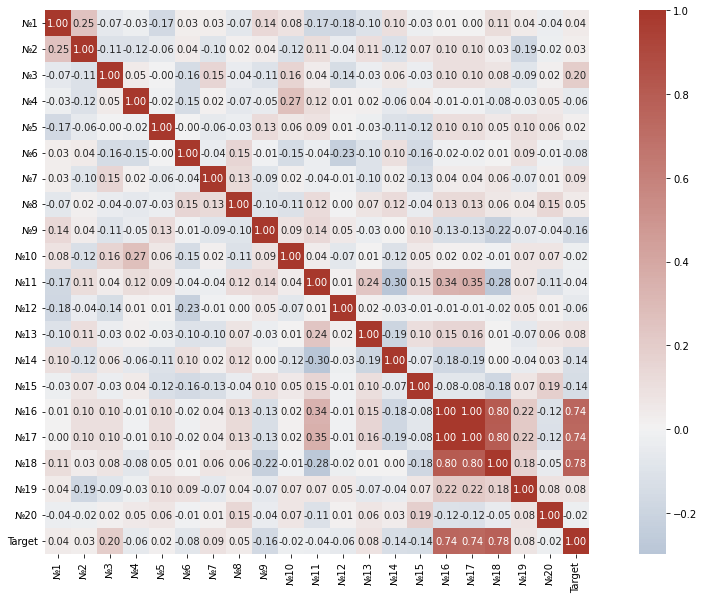

In [392]:
# Парная корреляция
matrix = df2.corr()

# Цветовая гамма
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
plt.figure(figsize=(18, 10))

sns.heatmap(matrix,  center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
plt.show()

Удалим столбцы:
№2,5,10,20 из-за низкой связи с целевой переменной Target, а также 
№16 - из-за сильной корреляции с №17.

In [424]:
df3=df2.drop(columns=['№2','№5','№10','№20','№16'])
X3 = df3.iloc[:,:-1]
df3

,№1,№3,№4,№6,№7,№8,№9,№11,№12,№13,№14,№15,№17,№18,№19,Target
0,-1.938078,1.265616,0.774430,0.317685,-0.398689,-1.406090,-0.421074,-0.584954,0.290220,0.607479,0.231302,0.116268,-0.418812,-0.920105,0.568530,0
1,0.688155,-0.120287,0.739876,-0.438171,0.342620,1.113560,0.295674,1.970748,0.603760,0.355534,-0.849875,-0.006380,0.317379,-0.245761,-1.527082,1
2,-2.095322,1.081385,1.061837,-1.266852,1.559026,-0.025583,-1.870325,1.072805,0.776949,-0.275069,0.328969,-0.726112,0.421971,0.628581,1.118448,1
3,0.310108,0.846230,0.711594,-0.384709,1.137387,-1.395747,1.271446,-1.281741,0.654753,-1.406276,0.770609,-1.569556,0.064398,0.988330,1.584918,1
4,-0.243398,0.839294,0.202721,-0.797107,1.180200,-0.194636,0.182510,-1.839792,-0.293573,-1.231534,0.178695,1.211806,-0.986794,-1.882984,-0.428863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.332295,0.760426,-0.793522,-0.006607,0.385540,-0.652434,0.686797,-0.302623,0.730475,0.090614,-1.406238,0.876816,0.213693,0.840570,-1.542675,1
96,-0.155804,-1.159491,0.857514,-0.058241,-1.329819,-1.104996,-1.492867,-0.828399,0.641995,1.353399,1.362986,-1.471705,-0.327488,-0.490425,-1.234101,0
97,0.915904,-1.394316,-1.217731,-0.098969,-0.576949,-1.243697,-0.098297,-0.719520,0.162402,-0.990433,-1.611044,0.264104,-0.228433,-0.254612,1.300830,0
98,-0.773664,1.042339,-1.116191,0.300159,2.182171,0.111544,-0.690747,1.892277,0.873968,1.391435,-0.428457,1.839292,-0.013158,-1.208505,-1.006829,0


<h4>b) Отсеките низковариативные признаки (VarianceThreshold).

In [413]:
#отбираем признаки, у которых дисперсия меньше заданного значения
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.9)
X4 = sel.fit_transform(X2)
X4.shape

(100, 15)

<h4>c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [425]:
scores3a = cross_val_score(clf, X3, y, cv=5)
print('scores3a = {} \nmean score3a = {:.3f} +/- {:.3f}'.format(scores3a, scores3a.mean(), scores3a.std()))
scores3b = cross_val_score(clf, X4, y, cv=5)
print('scores3b = {} \nmean score4 = {:.3f} +/- {:.3f}'.format(scores3b, scores3b.mean(), scores3b.std()))

scores3a = [1.  0.8 0.9 0.9 1. ] 
mean score3a = 0.920 +/- 0.075
scores3b = [1.   0.8  0.95 0.85 1.  ] 
mean score4 = 0.920 +/- 0.081


<h3>4.Осуществите отбор признаков на основе дисперсионного анализа:
<h4>a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [396]:
# нормализуем датасет
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(X)

X5 = pd.DataFrame(d)
X5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.110504,0.160501,0.688616,0.615618,0.313301,0.511475,0.336340,0.254568,0.373624,0.619050,0.385235,0.642197,0.617764,0.543050,0.511772,0.315988,0.317505,0.348570,0.620137,0.402697
1,0.611705,0.523044,0.442016,0.608636,0.000000,0.366060,0.507344,0.663603,0.520017,0.307687,0.900574,0.707708,0.551156,0.367338,0.487761,0.723675,0.729039,0.473178,0.063382,0.385498
2,0.080495,0.429234,0.655835,0.673700,0.517228,0.206635,0.787942,0.478677,0.077620,0.128210,0.719510,0.743893,0.384440,0.558923,0.346855,0.784150,0.787506,0.634742,0.766238,0.436064
3,0.539557,0.380156,0.613993,0.602920,0.731414,0.376346,0.690680,0.256247,0.719315,0.366419,0.244733,0.718362,0.085376,0.630698,0.181730,0.588389,0.587621,0.701218,0.890168,0.344638
4,0.433923,0.181283,0.612759,0.500084,0.152436,0.297007,0.700556,0.451233,0.496904,0.493338,0.132207,0.520221,0.131574,0.534500,0.726251,0.000000,0.000000,0.170646,0.355153,0.580729


In [418]:
# найдем 5 лучших признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X6 = SelectKBest(chi2, k=5).fit_transform(X5, y2)
X6.shape

(100, 5)

<h4>b) Повторите п. 2 на отобранных признаках.

In [419]:
scores4a = cross_val_score(clf, X6, y, cv=5)
print('scores4a = {} \nmean score4a = {:.3f} +/- {:.3f}'.format(scores4a, scores4a.mean(), scores4a.std()))

scores4a = [0.95 0.85 0.9  0.85 1.  ] 
mean score4a = 0.910 +/- 0.058


<h3>5.Отбор с использованием моделей:
<h4>a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [428]:
# создадим мультиклассовой объект LogisticRegression и запишем его в переменную model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'multinomial')
 
# обучим нашу модель на основе нормализованных данных
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.2, random_state=0)
model.fit(X5_train, y_train)
# посмотрим на получившиеся веса модели
model.coef_

array([[ 1.95765988e-02,  1.52578929e-03,  5.60388571e-01,
        -2.29725284e-01, -7.74504812e-02, -3.49626306e-01,
         1.07451279e-01, -4.28530757e-02, -3.22349573e-02,
        -1.66485860e-01, -1.06813149e-01, -1.67597165e-01,
         3.07068220e-01, -2.44560220e-01, -1.75648416e-01,
         1.47106205e+00,  1.46525684e+00,  1.54206185e+00,
         3.27345326e-02,  2.38170306e-01]])

In [429]:
#отсортируем их по модулю
df5 = pd.DataFrame(np.abs(model.coef_))
df5.columns = ['№1', '№2', '№3', '№4','№5', '№6', '№7', '№8','№9', '№10', '№11', '№12','№13', '№14', '№15', '№16','№17', '№18', '№19', '№20']
df5.transpose().sort_values(0)

,0
№2,0.001526
№1,0.019577
№9,0.032235
№19,0.032735
№8,0.042853
№5,0.077450
№11,0.106813
№7,0.107451
№10,0.166486
№12,0.167597


In [430]:
# Удалим 5 худших признаков. Остальные признаки учтем в  модели SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
df6=df2.drop(columns=['№2','№1','№9','№19','№8'])
X7 = df6.iloc[:,:-1]
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X7, y2)
model = SelectFromModel(lsvc, prefit=True)
X7 = model.transform(X7)
X7.shape

(100, 2)

In [431]:
scores5a = cross_val_score(clf, X7, y, cv=5)
print('scores5a = {} \nmean score5a = {:.3f} +/- {:.3f}'.format(scores5a, scores5a.mean(), scores5a.std()))

scores5a = [1.   0.85 0.95 0.85 1.  ] 
mean score5a = 0.930 +/- 0.068


<h4>b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [405]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
print('scores = {:.3f}'.format(clf.score(X_test, y_test)))

scores = 0.750


In [406]:
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=True)
feature_imp

8     0.007596
1     0.010540
11    0.012645
19    0.012929
18    0.013152
6     0.013774
9     0.014274
7     0.014974
4     0.015444
14    0.016838
13    0.017818
10    0.020881
0     0.021415
5     0.024156
3     0.026243
12    0.027266
2     0.033393
17    0.175770
16    0.237652
15    0.283239
dtype: float64

<h4>c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [407]:
df7=df2.drop(columns=['№4','№13','№2','№5','№10'])
X8, y8 = df7.iloc[:,:-1], df7.iloc[:,-1]
scores5b = cross_val_score(clf, X8, y8, cv=5)
print('scores5b = {} \nmean score5b = {:.3f} +/- {:.3f}'.format(scores5b, scores5b.mean(), scores5b.std()))

scores5b = [0.95 0.85 0.85 0.85 1.  ] 
mean score5b = 0.900 +/- 0.063


<h3>6.Перебор признаков:
a) SequentialFeatureSelector.

In [408]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=15)
X9, y9 = df2.iloc[:,:-1], df2.iloc[:,-1]
sfs.fit(X9, y9)
#SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),n_features_to_select=15)
sfs.get_support()

X10 = sfs.transform(X9)
X10.shape

(100, 15)

<h4>b) Повторите п. 2 на отобранных признаках.

In [409]:
scores6a = cross_val_score(clf, X10, y, cv=5)
print('scores6a = {} \nmean score6a = {:.3f} +/- {:.3f}'.format(scores6a, scores6a.mean(), scores6a.std()))

scores6a = [0.95 0.85 0.85 0.85 1.  ] 
mean score6a = 0.900 +/- 0.063


<h3>7.Сформулируйте выводы по проделанной работе:

<h4>a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [432]:
data = {'номер пункта' : ['2', '3a', '3b', '4a', '5a', '5b', '6a'],
        'способ выбора признаков' : ['LogisticRegression', 'Корреляция', 'VarianceThreshold', 'SelectKBest', 'SelectFromModel','RandomForest', 'SequentialFeatureSelector'],
        'количество признаков' : [X.shape[1], X3.shape[1], X4.shape[1], X6.shape[1], X7.shape[1], X8.shape[1], X10.shape[1]],
        'средняя точность модели' : [scores2.mean(), scores3a.mean(), scores3b.mean(), scores4a.mean(), scores5a.mean(), scores5b.mean(), scores6a.mean()]}
frame = pd.DataFrame(data)
frame

,номер пункта,способ выбора признаков,количество признаков,средняя точность модели
0,2,LogisticRegression,20,0.85
1,3a,Корреляция,15,0.92
2,3b,VarianceThreshold,15,0.92
3,4a,SelectKBest,5,0.91
4,5a,SelectFromModel,2,0.93
5,5b,RandomForest,15,0.90
6,6a,SequentialFeatureSelector,15,0.90


Вывод: Использовались несколько методов обработки (сокращения количества) признаков. При этом каждый метод показал более лучший результат чем базовое решение. Улучшения в целом незначительные, так как базовый метод уже имеет хорошее значение scores = 0.85. В целом количество учитываемых признаков не сильно влияет на результат. Например модели с 2 (?) и 5 признаками также показали высокий scores = 0.93 и 0.91.
Последующие улучшения включают: изменение параметров каждой модели и оценка чувствительности показателя точности к этим изменениям, в том числе с использованием графиков; применение библиотек для комплексного анализа признаков, например feature-selector, pandas-profiling; применение методов понижения размерности; выявление более сложных (линейных/нелинейных) зависимостей с целью выбора оптимального набора признаков.